# IPL DataAnalysis

Data analysis is defined as a process of cleaning, transforming, and modeling data to discover useful information for business decision-making. The purpose of Data Analysis is to extract useful information from data and taking the decision based upon the data analysis

## Introduction

Indian Premier League (IPL), Indian professional Twenty20 (T20) cricket league established in 2008. The league, which is based on a round-robin group and knockout format, has teams in major Indian cities.

IPL has developed into the most lucrative and most popular outlet for the game of cricket. Matches generally begin in late afternoon or evening so that at least a portion of them are played under floodlights at night to maximize the television audience for worldwide broadcasts. Initially, league matches were played on a home-and-away basis between all teams, but, with the planned expansion to 10 clubs (divided into two groups of five) in 2011, that format changed so that matches between some teams would be limited to a single encounter. The top four teams contest three play-off matches, with one losing team being given a second chance to reach the final, a wrinkle aimed at maximizing potential television revenue. The play-off portion of the tournament involves the four teams that finished at the top of the tables in a series of knockout games that allows one team that lost its first-round game a second chance to advance to the final match.

## Data description

- Ist Data file which i have contains matches description means which team is winner,among which two teams match were being conduct,toss winner team,player of match,when and where it was held and what was the result of match.

- IInd Data file which i have contains about every ball means name of batting team and balling team, name of batsman and baller with also name of non-striker batsman,run they score on that ball,innings,what ball throw at which over and is anyone out at that ball.

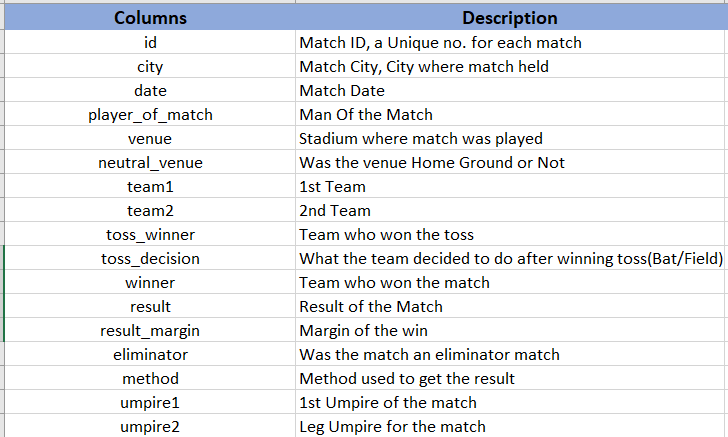

In [29]:
from IPython import display
display.Image("./ipl-dataset_2008-2020/data_desc_1.png")

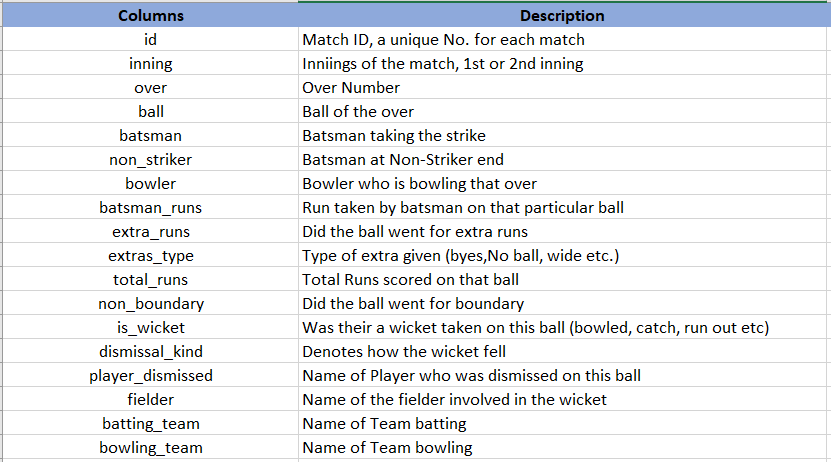

In [28]:
display.Image("./ipl-dataset_2008-2020/data_desc_2.png")

## Downloading the Dataset

**TODO** - add some explanation here

The dataset has been downloaded and extracted.

In [1]:
# Change this
data_dir = './ipl-dataset_2008-2020'

In [2]:
import os
os.listdir(data_dir)

['IPL_Ball-by-Ball_2008-2020.csv', 'IPL_Matches_2008-2020.csv']

Let us save and upload our work to Jovian before continuing.

In [5]:
project_name = "ipl-datanalysis"

In [6]:
!pip install jovian --upgrade -q

In [7]:
import jovian

In [9]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "googleboy/ipl-datanalysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/googleboy/ipl-datanalysis


'https://jovian.ai/googleboy/ipl-datanalysis'

## Data Preparation and Cleaning

Data cleaning, or data cleansing, is the important process of **correcting or removing incorrect**, **incomplete**, or **duplicate** data within a dataset. Data cleaning should be the first step in your workflow. When working with large datasets and combining various data sources, there’s a strong possibility you may duplicate or mislabel data. If you have inaccurate or incorrect data, it will lose its quality, and your algorithms and outcomes become unreliable.

Data cleaning **differs from data transformation** because you’re actually removing data that doesn’t belong in your dataset. With data transformation, you’re changing your data to a different format or structure. Data transformation processes are sometimes referred to as **data wrangling or data munging**. The data cleaning process is what we’ll focus on today.



In [3]:
import pandas as pd
import numpy as np

In [4]:
df1 = pd.read_csv(data_dir + '/IPL_Matches_2008-2020.csv')
df1

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,NaN,PR Reiffel,S Ravi
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi


In [5]:
df1.describe()

,id,neutral_venue,result_margin
count,8.160000e+02,816.000000,799.000000
mean,7.563496e+05,0.094363,17.321652
std,3.058943e+05,0.292512,22.068427
min,3.359820e+05,0.000000,1.000000
25%,5.012278e+05,0.000000,6.000000
50%,7.292980e+05,0.000000,8.000000
75%,1.082626e+06,0.000000,19.500000
max,1.237181e+06,1.000000,146.000000


### Observations:
The following inferences can be made from the describe() method:
- The .csv file has data of IPL matches starting from the season 2008 to 2020.
- The biggest margin of victory for the team batting first(win_by_runs) is 146 runs.
- The biggest victory of the team batting second(win_by_wickets) is by 10 wickets.
- 50% of the victorious teams that bat first won by a margin of 28 runs.
- 65% of the victorious teams that bat second won by a margin of 6 wickets.
- There were 816 IPL matches hosted from 2008 to 2020.

In [6]:
df2 = pd.read_csv(data_dir + '/IPL_Ball-by-Ball_2008-2020.csv')
df2

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193463,1237181,1,12,5,RR Pant,SS Iyer,NM Coulter-Nile,0,0,0,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193464,1237181,1,12,6,RR Pant,SS Iyer,NM Coulter-Nile,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193465,1237181,1,13,1,RR Pant,SS Iyer,KH Pandya,0,1,1,0,0,NaN,NaN,NaN,wides,Delhi Capitals,Mumbai Indians
193466,1237181,1,13,2,RR Pant,SS Iyer,KH Pandya,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians


In [7]:
df1.isnull().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193468 non-null  int64 
 1   inning            193468 non-null  int64 
 2   over              193468 non-null  int64 
 3   ball              193468 non-null  int64 
 4   batsman           193468 non-null  object
 5   non_striker       193468 non-null  object
 6   bowler            193468 non-null  object
 7   batsman_runs      193468 non-null  int64 
 8   extra_runs        193468 non-null  int64 
 9   total_runs        193468 non-null  int64 
 10  non_boundary      193468 non-null  int64 
 11  is_wicket         193468 non-null  int64 
 12  dismissal_kind    9495 non-null    object
 13  player_dismissed  9495 non-null    object
 14  fielder           6784 non-null    object
 15  extras_type       10233 non-null   object
 16  batting_team      193468 non-null  obj

In [9]:
df1 = df1.drop(["method"], axis=1)

In [10]:
df = df1.copy()
df

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,Y,Nitin Menon,PR Reiffel
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,CB Gaffaney,Nitin Menon
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,PR Reiffel,S Ravi
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,PR Reiffel,S Ravi


In [11]:
df.loc[df.result == 'tie', 'result_margin'] = 0.0

In [12]:
df.loc[df.venue == 'Sharjah Cricket Stadium', 'city'] = 'Sharjah'
df.loc[df.venue == 'Dubai International Cricket Stadium', 'city'] = 'Dubai Sports City'

In [13]:
df['Season'] = pd.DatetimeIndex(df['date']).year

In [14]:
df = df.dropna()

In [15]:
df.isnull().sum()

id                 0
city               0
date               0
player_of_match    0
venue              0
neutral_venue      0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
eliminator         0
umpire1            0
umpire2            0
Season             0
dtype: int64

'df[df.isna().any(axis=1)]' is used to check rows with nan values

In [16]:
ball_df = df2.copy()
ball_df

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193463,1237181,1,12,5,RR Pant,SS Iyer,NM Coulter-Nile,0,0,0,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193464,1237181,1,12,6,RR Pant,SS Iyer,NM Coulter-Nile,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193465,1237181,1,13,1,RR Pant,SS Iyer,KH Pandya,0,1,1,0,0,NaN,NaN,NaN,wides,Delhi Capitals,Mumbai Indians
193466,1237181,1,13,2,RR Pant,SS Iyer,KH Pandya,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians


In [17]:
ball_df = ball_df.drop(["dismissal_kind","player_dismissed","fielder","extras_type"], axis=1)

In [18]:
ball_df

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,Kolkata Knight Riders,Royal Challengers Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193463,1237181,1,12,5,RR Pant,SS Iyer,NM Coulter-Nile,0,0,0,0,0,Delhi Capitals,Mumbai Indians
193464,1237181,1,12,6,RR Pant,SS Iyer,NM Coulter-Nile,1,0,1,0,0,Delhi Capitals,Mumbai Indians
193465,1237181,1,13,1,RR Pant,SS Iyer,KH Pandya,0,1,1,0,0,Delhi Capitals,Mumbai Indians
193466,1237181,1,13,2,RR Pant,SS Iyer,KH Pandya,1,0,1,0,0,Delhi Capitals,Mumbai Indians


In [19]:
ball_df = ball_df.dropna()

In [20]:
ball_df.isnull().sum()

id              0
inning          0
over            0
ball            0
batsman         0
non_striker     0
bowler          0
batsman_runs    0
extra_runs      0
total_runs      0
non_boundary    0
is_wicket       0
batting_team    0
bowling_team    0
dtype: int64

In [27]:
import jovian

In [28]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "googleboy/ipl-datanalysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/googleboy/ipl-datanalysis


'https://jovian.ai/googleboy/ipl-datanalysis'

## Exploratory Analysis and Visualization

The main purpose of EDA is to help look at data before making any assumptions. It can help identify obvious errors, as well as better understand patterns within the data, detect outliers or anomalous events, find **interesting relations among the variables**.

Data scientists can use exploratory analysis to ensure the results they produce are valid and applicable to any desired business outcomes and goals. EDA also helps stakeholders by confirming they are asking the right questions. EDA can help answer questions about **standard deviations, categorical variables, and confidence intervals**. Once EDA is complete and insights are drawn, its features can then be used for **more sophisticated data analysis** or modeling, including **machine learning**.



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [48]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Now starting explore dataset and plotting various graphs 

In [28]:
winners_list = df.winner.value_counts()
winner_df = pd.DataFrame(winners_list)

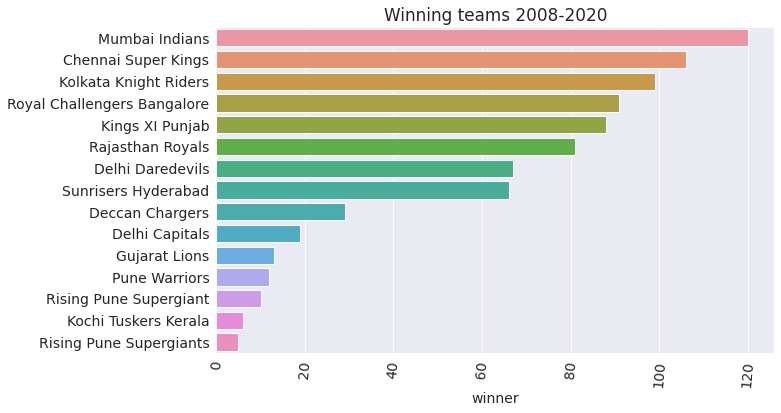

In [52]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=85)
plt.title('Winning teams 2008-2020')
sns.barplot(x=winner_df.winner, y=winner_df.index);

It is clear from above graph that Mumbai Indians is best team throughout IPL seasons followed by Chennai Super Kings, Kolkata Knight Riders and Royal Challengers Banglore.

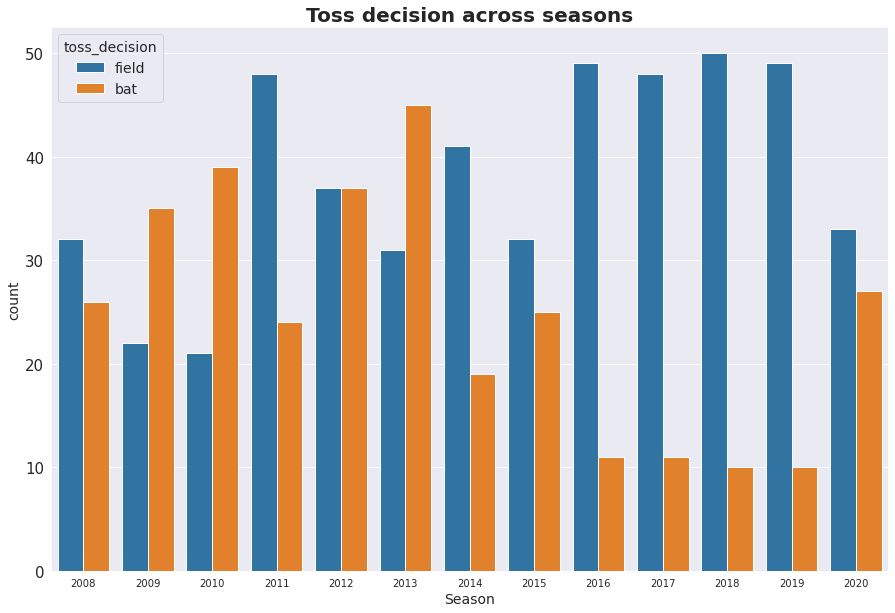

In [65]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize=10)
plt.yticks(fontsize=15)
plt.title('Toss decision across seasons',fontsize=20,fontweight="bold")
sns.countplot(x='Season',hue='toss_decision',data=df)
plt.show()

The climate of India was significantly **warmer than normal** onwards 2015 in line with the warmer than normal global climate observed during the period. According to the India Meteorological Department, the annual mean land-surface air temperature averaged over the country during 2015 was +0.670C above the 1961-1990 average, thus making **the year 2015 as the third warmest year** on record since nation-wide records commenced in 1901. 

All weather affects cricket but some conditions more than others will affect the pitch. Dry and hot conditions will really dry the pitch out and give the batsmen something to think about on the latter days of a test match.

With hot weather, expect a pitch to crack which will lead to areas of the **pitch that will react well to spin bowling and also give the seamers some variable bounce**. You can find out where the hottest places in a country are by viewing stats on a daily basis. Often on pitches after many days of **very hot and dry weather** we will see **balls keep low, bounce high and turn dramatically**.

So we conclude that this may be a reason to choose field after winning toss instead of batting after 2014  seasons.

In [80]:
toss_winner = df[(df.toss_decision == 'field') & (df.result == 'wickets') | (df.toss_decision == 'bat') & (df.result == 'runs')]

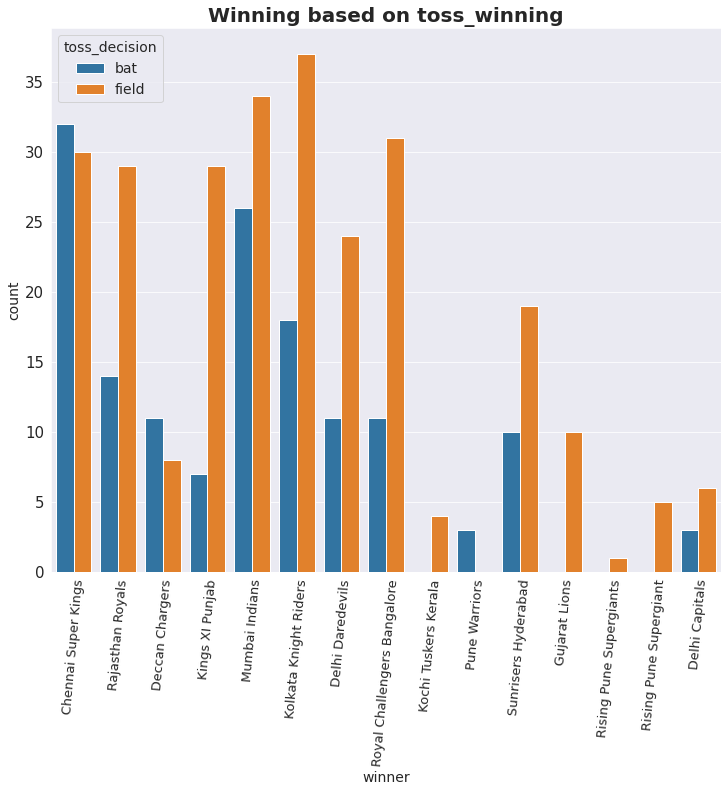

In [86]:
plt.figure(figsize=(12,10))
plt.xticks(fontsize=13,rotation=85)
plt.yticks(fontsize=15)
plt.title('Winning based on toss_winning',fontsize=20,fontweight="bold")
sns.countplot(x='winner',hue='toss_decision',data=toss_winner)
plt.show()

It is interesting to see that chennai super kings choose batting more times than bowling after winning toss as may be they have strong batting lineup than bolwers.

In [91]:
df['player_of_match'].value_counts().head(20)

AB de Villiers    23
CH Gayle          22
RG Sharma         18
DA Warner         17
MS Dhoni          17
SR Watson         16
YK Pathan         16
SK Raina          14
V Kohli           13
G Gambhir         13
AM Rahane         12
MEK Hussey        12
AD Russell        11
A Mishra          11
KA Pollard        11
DR Smith          11
V Sehwag          11
AT Rayudu         10
JH Kallis         10
SE Marsh           9
Name: player_of_match, dtype: int64

Its suprise to see that two centuries making players aren't from top 3 successful teams.
- **AB de Villiers** is the player who won the most player of the match awards and hence is the most valuable player followed by <br>  **Chris Gayle and Rohit Sharma**.
- **Six Indian players** have figured in the top ten IPL players list.

In [40]:
def toss_chooser(stadium_name):
    user_stadium=df.loc[(df['venue']==stadium_name)]
    user_stadium_win_by_runs=user_stadium[user_stadium['result'] == 'runs']
    slices=[len(user_stadium_win_by_runs),len(user_stadium)-len(user_stadium_win_by_runs)]
    labels=['Batting first','Batting Second']
    plt.pie(slices,labels=labels,startangle=20,shadow=1,explode=(0,0.2),autopct='%2.1f%%',colors=['#1519ef','#fc4811'])
    plt.title(stadium_name)
    plt.show()

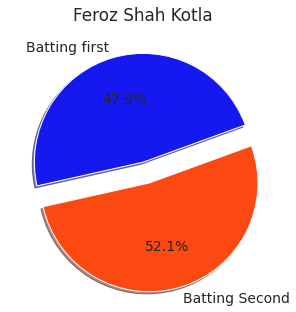

In [45]:
toss_chooser('Feroz Shah Kotla')

This pie chart shows which stadium suitable for batting or fielding more. You have to only pass the name of stadium in toss_chooser function.

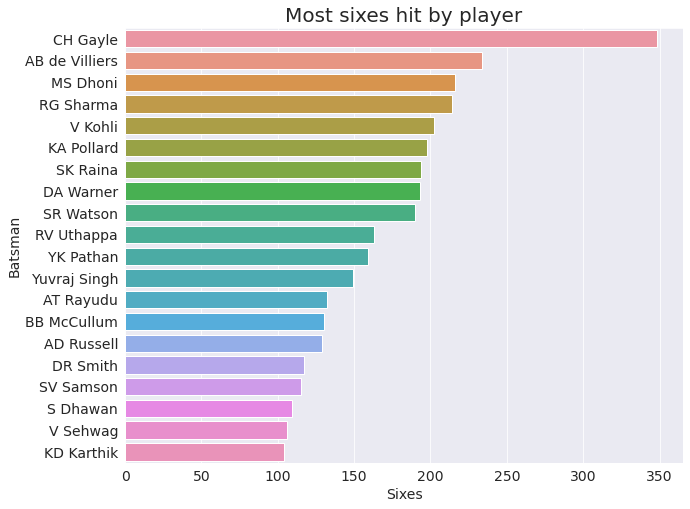

In [40]:
plt.figure(figsize=(10,8))
data = ball_df[ball_df['batsman_runs'] == 6]['batsman'].value_counts()[:20]
sns.barplot(y=data.index,x=data,orient='h')
plt.xlabel('Sixes')
plt.ylabel('Batsman')
plt.title('Most sixes hit by player', fontsize=20)
plt.show()

Chris Gayle has hit the highest number of sixes in an IPL carrer with the number being 350 in the entire IPL history. Followed by AB De Villiers and MS Dhoni.

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='runs'>

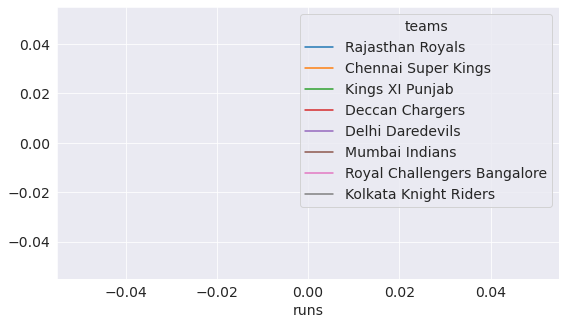

In [110]:
dfinal = ball_df.merge(df, on="id", how = 'inner')
runs_by_teams_perseason = dfinal.groupby(['Season','batting_team']).sum()['total_runs'].sort_values(ascending=False)
season_lst = [] 
teams_lst = []
for items in runs_by_teams_perseason.index.values:
    season_lst.append(items[0])
    teams_lst.append(items[1])
    
teams_df = pd.DataFrame({
        'seasons':season_lst,
        'teams':teams_lst,
        'runs':runs_by_teams_perseason
    })  
teams_df = teams_df.reset_index(drop=True)
plt.bar()
# teams_df = teams_df[teams_df.seasons == 2008]
# sns.lineplot('runs', hue='teams', data=teams_df)

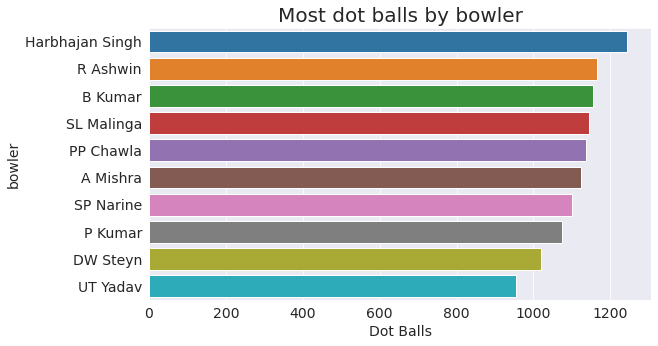

In [53]:
data = ball_df[ball_df['total_runs'] == 0].groupby('bowler').count()['id'].sort_values(ascending=False)[:10]
sns.barplot(y=data.index,x=data,orient='h')
plt.xlabel('Dot Balls')
plt.ylabel('bowler')
plt.title('Most dot balls by bowler', fontsize=20)
plt.show()

Harbhajan has throw the highest number of dot balls in an IPL carrer with the number being 1000+ in the entire IPL history. Followed by R Ashwin and Bhuvneshwar Kumar.

Let us save and upload our work to Jovian before continuing

In [25]:
import jovian

In [54]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "googleboy/ipl-datanalysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/googleboy/ipl-datanalysis


'https://jovian.ai/googleboy/ipl-datanalysis'

## Asking and Answering Questions

We've already gained several insights about the players and the matches in IPL by exploring individual columns of the dataset. 
Let’s try to find answers to the questions that will linger in an IPL fan’s mind. In Part I, we are dealing with some very basic questions. In Part II, we will delve deeper.



#### Q1: Name of  favourite stadiums where top 5 winnings teams wins most of games

In [63]:
winning_teams = winner_df.head(5).index
for team in winning_teams:
    print("Name of team:", '\033[1m' +team+'\033[0m')
    print(df[df.winner == team].venue.value_counts().head(5))
    print('<-------------------------->')
    

Name of team: Mumbai Indians
Wankhede Stadium                             42
Eden Gardens                                 10
M Chinnaswamy Stadium                         8
Rajiv Gandhi International Stadium, Uppal     7
Brabourne Stadium                             6
Name: venue, dtype: int64
<-------------------------->
Name of team: Chennai Super Kings
MA Chidambaram Stadium, Chepauk            40
Wankhede Stadium                            7
Dubai International Cricket Stadium         6
Feroz Shah Kotla                            6
Maharashtra Cricket Association Stadium     5
Name: venue, dtype: int64
<-------------------------->
Name of team: Kolkata Knight Riders
Eden Gardens                                 45
M Chinnaswamy Stadium                         6
Sheikh Zayed Stadium                          6
Rajiv Gandhi International Stadium, Uppal     5
Feroz Shah Kotla                              5
Name: venue, dtype: int64
<-------------------------->
Name of team: Royal Challe

#### Q2: Top 10 most wickets taking bowlers

In [71]:
data = ball_df[ball_df.is_wicket == 1]['bowler'].value_counts().head(10)

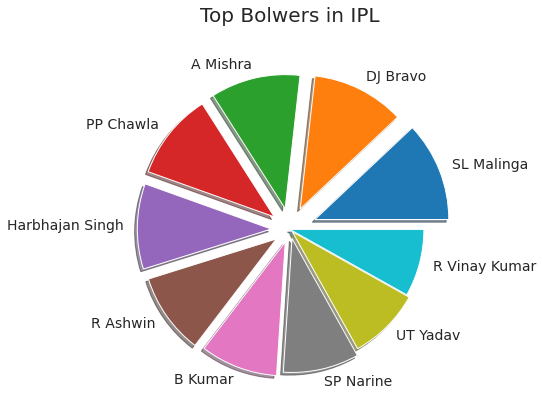

In [96]:
plt.figure(figsize=(6,8))
explode = (0.2, 0.17, 0.16, 0.15, 0.14, 0.125, 0.1, 0.07, 0.025, 0.0)
plt.pie(x=data, explode=explode, shadow=True, labels=data.index, pctdistance=6.7)
plt.title("Top Bolwers in IPL", fontsize=20, pad=40);

All time economic bowlers are **SL Malinga and DJ Bravo**. This inference is good but it across all seasons. It is good for the records board but I need to see across all seasons. Not all bowlers play every season.
So, I can see the top 10 bowling performances across all seasons.

#### Q3: Name of teams scored maximum score in powerplay

In [130]:
runs_by_team = ball_df[ball_df['over']<7].groupby(['id','batting_team']).sum()['total_runs']
runs_by_team.groupby('batting_team').max().sort_values(ascending=False)

batting_team
Chennai Super Kings            107
Kolkata Knight Riders          105
Kochi Tuskers Kerala            97
Kings XI Punjab                 95
Delhi Daredevils                90
Royal Challengers Bangalore     90
Sunrisers Hyderabad             89
Deccan Chargers                 87
Mumbai Indians                  87
Gujarat Lions                   84
Rajasthan Royals                83
Rising Pune Supergiant          77
Delhi Capitals                  76
Rising Pune Supergiants         74
Pune Warriors                   67
Name: total_runs, dtype: int64

Powerplay in an IPL game is a **mandatory fielding restriction imposed on every fielding side for the first six overs** of the 20 over innings. This means that only **two fielders can stay outside the inner circle**, making the batting comparatively easy.
On the same note, it is also true that it could be a **trap for the batsmen** as this will get them to take a risk and lose their wickets in the first six overs.

**CSK and KKR** shows tremendous performance in powerplay by hitting highest runs i.e 107(CSK) and 105(KKR) in IPL history.

#### Q4: Highest winning margins by runs and wickets

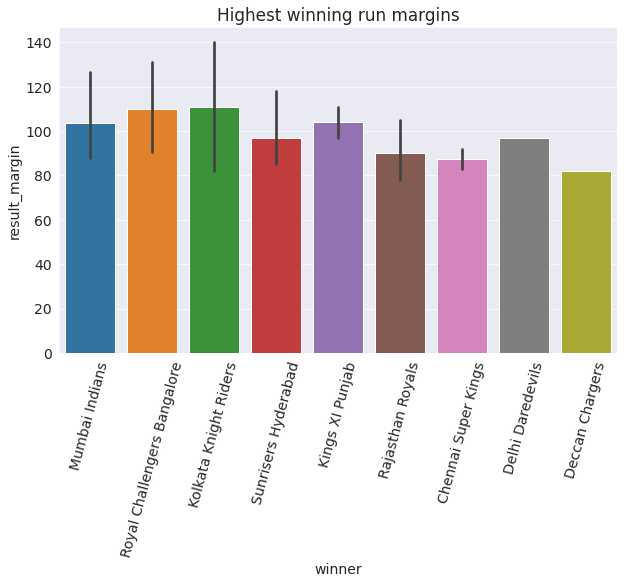

In [148]:
runs_winner = df[['winner','result_margin']].nlargest(30,'result_margin')
plt.figure(figsize=(10,6))
plt.xticks(rotation=75)
plt.title('Highest winning run margins')
sns.barplot(x=runs_winner.winner, y=runs_winner.result_margin);

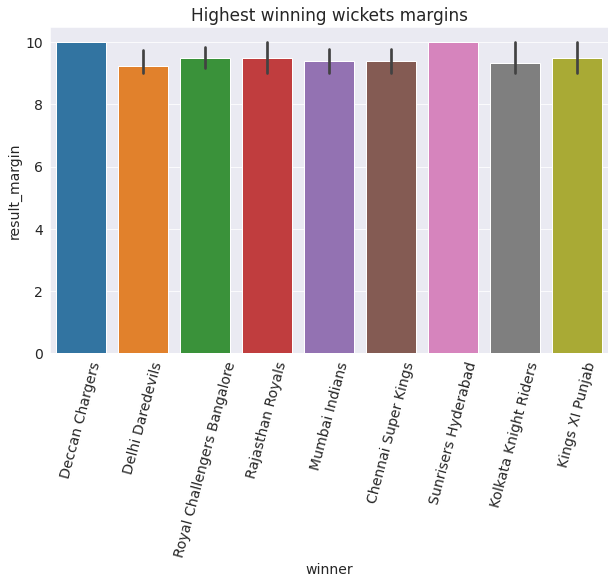

In [153]:
runs_winner = df[df.result == 'wickets'][['winner','result_margin']].nlargest(30,'result_margin')
plt.figure(figsize=(10,6))
plt.xticks(rotation=75)
plt.title('IPL victoies when')
sns.barplot(x=runs_winner.winner, y=runs_winner.result_margin);

#### Q5: Does toss winning has any advantage in match winning ?

In cricket, the toss is the flipping of a coin to determine which captain will have the right to choose whether their team will bat or field at the start of the match. So In this I am going to explore **toss winning on winner team** to get the percentage of winners' success.

In [23]:
win_counts = 0
for index, value in df.iterrows():
    if(value['toss_winner'] == value['winner']):
        win_counts += 1
print(f'The number of times the team winning toss have won: {win_counts}')
prob = win_counts/len(df)
print('The probability of winning if won the toss: {:.2f}%' .format(prob * 100))        

The number of times the team winning toss have won: 418
The probability of winning if won the toss: 51.48%


#### Q6: Which city hosted the maximum no. of IPL matches ?

In [48]:
city_matches = df.city.value_counts()
cities_df = pd.DataFrame(city_matches)
cities_df

,city
Mumbai,101
Kolkata,77
Delhi,73
Hyderabad,64
Bangalore,63
Chennai,57
Chandigarh,56
Jaipur,47
Pune,38
Dubai Sports City,33


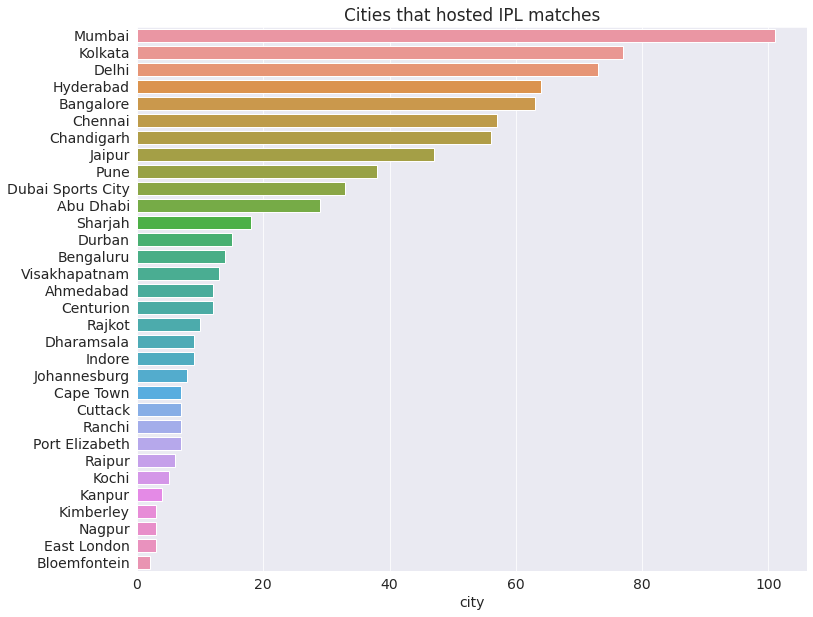

In [46]:
plt.figure(figsize=(12,10))
plt.title("Cities that hosted IPL matches")
sns.barplot(x=cities_df.city, y=cities_df.index, data=cities_df);

Mumbai seems to have taken to the Indian Premier League (IPL) like no other city. As per data released by rating agency aMap, the metro leads in viewership for T20 IPL matches. Mumbai had TV rating points, or TRPs, ranging from 3.1-8 for matches played during this period. Besides Mumbai, the aMap data covers Delhi, Kolkata, Hyderabad, Chennai and Punjab.

Mumbai reported maximum eyeballs for matches played by home team Mumbai Indians. In fact, the match played between the Mumbai team and Royal Challengers on May 3, 2009, recorded the highest TRP ratings of 8 in the city. Cricket buffs in the city also tuned into the telly to watch other teams play.

So BCCI always hosted matches in these metropolitan cities to gain much high profits and huge viewerships.

#### Q7: Which umpire has officiated the most number of IPL matches on-field?

In [115]:
umpire1_ser = df['umpire1'].value_counts()
umpire2_ser = df['umpire2'].value_counts()

In [116]:
umpires_df = pd.concat([umpire1_ser, umpire2_ser], axis=1)
umpires_df = umpires_df.fillna(0)

In [117]:
umpire_ser = umpires_df.sum(axis=1)

umpires_df = pd.DataFrame(columns=["umpire", "matches"])

for items in umpire_ser.iteritems():
    temp_df = pd.DataFrame({
        'umpire':[items[0]],
        'matches':[items[1]]
    })
    umpires_df= umpires_df.append(temp_df, ignore_index=True) 
    

In [118]:
umpires_df.sort_values('matches', ascending=False).head(10)

,umpire,matches
6,S Ravi,121.0
0,HDPK Dharmasena,93.0
1,AK Chaudhary,87.0
11,C Shamshuddin,82.0
3,M Erasmus,65.0
13,Nitin Menon,57.0
28,CK Nandan,57.0
46,SJA Taufel,55.0
2,Asad Rauf,51.0
16,VA Kulkarni,50.0


S. Ravi (Sundaram Ravi) has officiated the most number of IPL matches on-field, followed by former Sri Lankan international cricketer HDPK Dharmasena and famous IPL on-field umpire AK Chaudhary.

#### Q8 Name of players having most centuries in their IPL career

In [35]:
runs = ball_df.groupby(['batsman','id'])['total_runs'].sum()
runs[runs >= 100].droplevel(level=1).groupby('batsman').count().sort_values(ascending=False)[:10]

batsman
CH Gayle          10
V Kohli            6
DA Warner          4
SR Watson          4
AB de Villiers     3
KL Rahul           3
S Dhawan           3
SK Raina           3
V Sehwag           3
AM Rahane          3
Name: total_runs, dtype: int64

As we previously show that most of times in IPL seasons man of match is Chris Gayle as may be the reason that hits most centuries in his IPL career. And second one after chris gayle, Virat Kholi is one who having most centuries in his IPL career

#### Q9 Which players have best patnership in IPL across seasons ?

Let us save and upload our work to Jovian before continuing.

In [28]:
import jovian

In [72]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "googleboy/ipl-datanalysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/googleboy/ipl-datanalysis


'https://jovian.ai/googleboy/ipl-datanalysis'

## Inferences and Conclusions

We've drawn many inferences from this given dataset. Here's a summary of a few of them:
- Mumbai Indians is the most successful team in IPL.
- Mumbai Indians has won the most number of toss.
- There were more matches won by chasing the total(435 matches) than defending(364 matches).
- When defending a total, the biggest victory was by 146 runs(Mumbai Indians defeated Delhi Daredevils by 146 runs on 06 May 2017 at Feroz Shah Kotla stadium, Delhi).
- When chasing a target, the biggest victory was by 10 wickets(without losing any wickets) and there were 27 such instances.
- The Mumbai city has hosted the most number of IPL matches.
- Chennai Super Kings (CSK) and Kolkata Knight Riders (KKR) show monumental performance in powerplay.
- Chris Gayle has won the maximum number of player of the match title and having most number of centuries hit by him.
- Winning toss gives a slight edge(51% probability of winning) against the opponents.
- Harbhajan Singh has throw most dot balls in his IPL carrer.
- Five Indian players have figured in the top ten IPL players list.
- S. Ravi(Sundaram Ravi) has officiated the most number of IPL matches on-field followed by HDPK Dharmasena and AK Chaudhary. .
- Wankhede stadium has hosted the maximum number of IPL matches.
- Till 2020, 32 venues have hosted 816 IPL matches.

In [30]:
import jovian

In [31]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aakashns/zerotopandas-course-project-starter" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/aakashns/zerotopandas-course-project-starter


'https://jovian.ml/aakashns/zerotopandas-course-project-starter'

## Exercises

There's a wealth of information to be discovered using the dataset, and we've barely scratched the surface. Here are some ideas for further exploration:

- Repeat the analysis for different countries premier leagues, and compare the results
- Pick a different set of columns to analyze other facets of the data
- Try Batting-Partnership Network between different players using [Complex Network Analysis in Cricket](https://arxiv.org/abs/1206.4835) 
- Prepare an analysis focusing on diversity - and identify areas where players are improving in upcoming matches i.e   how teams statistics change based on changes in teams.
- Compare the results of this year's dataset with the previous years and identify interesting trends

## References and Future Work

Check out the following resources to learn more about the dataset and tools used in this notebook:

- IPL Data Analysis: https://towardsdatascience.com/analysing-ipl-data-to-begin-data-analytics-with-python-5d2f610126a
- Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html
- Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html
- Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html
- `opendatasets` Python library: https://github.com/JovianML/opendatasets

As a next step, you can try out a project on another dataset of your choice: https://www.kaggle.com/datasets .

In [32]:
import jovian

In [35]:
jovian.commit(file)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aakashns/zerotopandas-course-project-starter" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/aakashns/zerotopandas-course-project-starter


'https://jovian.ml/aakashns/zerotopandas-course-project-starter'